In [1]:
# Read files 
import os

# Data wrangling and data visualistion 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing text
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

# Others
import numpy as np
from collections import Counter
import time
from statistics import mean


In [4]:
# Read data 
data = pd.read_csv("nlp_project/dataset/spam.csv", encoding = "latin-1")
data = data.dropna(how = "any", axis = 1)
data.columns = ['label','body_text']
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns.")

Input data has 5572 rows and 2 columns.


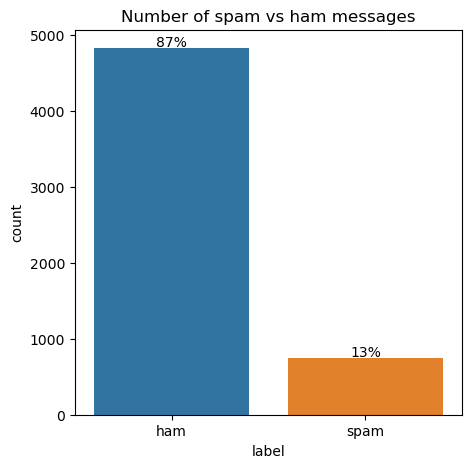

In [6]:
total = len(data)
plt.figure(figsize = (5, 5))
plt.title("Number of spam vs ham messages")
ax = sns.countplot(x = 'label', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [7]:
print(f"Number of null in label: {data.label.isnull().sum()}")
print(f"Number of null in text: {data.body_text.isnull().sum()}")

Number of null in label: 0
Number of null in text: 0


In [8]:
# body_len
data['body_len'] = data.body_text.apply(lambda x: len(x) - x.count(" "))

# punct%
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100
data['punct%'] = data.body_text.apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


In [9]:
# Summary statistics
data[['body_len', 'punct%']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
body_len,5572.0,65.512024,48.629795,2.0,29.0,50.0,98.0,740.0
punct%,5572.0,7.202656,6.701062,0.0,3.3,5.6,9.2,100.0


In [10]:
# Text with maximum body_len
list(data.loc[data.body_len == 740, 'body_text'])

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]

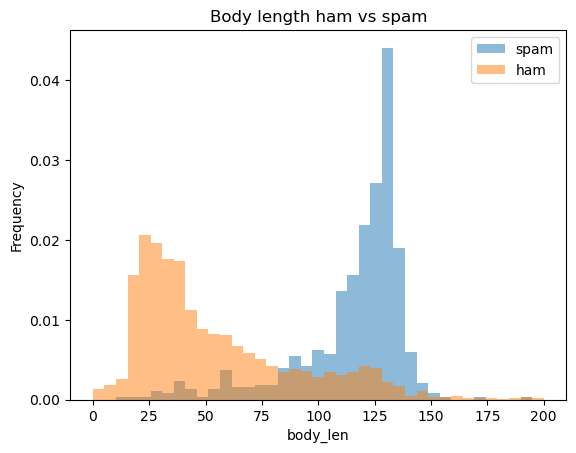

In [11]:
# Plot body_len distribution for ham and spam messages 
bins = np.linspace(0, 200, 40)
data.loc[data.label == 'spam', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'spam')
data.loc[data.label == 'ham', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'ham')
plt.legend(loc = 'best')
plt.xlabel("body_len")
plt.title("Body length ham vs spam")
plt.show()

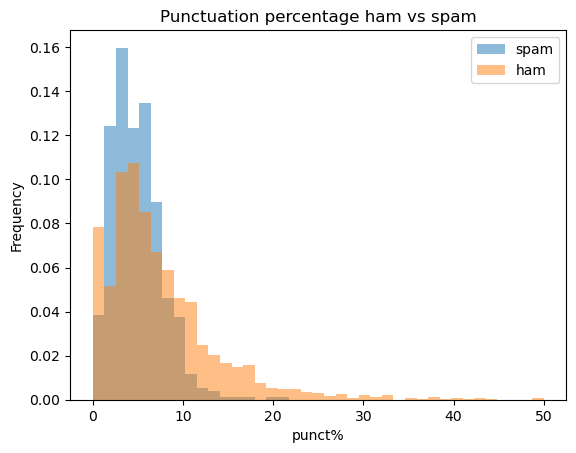

In [12]:
# Plot punct% for ham and spam messages 
bins = np.linspace(0, 50, 40)
data.loc[data.label == 'spam', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'spam')
data.loc[data.label == 'ham', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5,  density = True, label = 'ham')
plt.legend(loc = 'best')
plt.xlabel("punct%")
plt.title("Punctuation percentage ham vs spam")
plt.show()

In [13]:
"NLP" == "nlp"

False

In [14]:
"NLP".lower() == "nlp"

True

In [15]:
"I love NLP" == "I love NLP."

False

In [16]:
# List of punctuations in the string library 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Remove punctuation 
text = 'OMG! Did you see what happened to her? I was so shocked when I heard the news. :('
print(text)
text = "".join([word for word in text if word not in string.punctuation])
print(text)

OMG! Did you see what happened to her? I was so shocked when I heard the news. :(
OMG Did you see what happened to her I was so shocked when I heard the news 


In [18]:
# Available commands in the re library 
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [19]:
messy_text = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'
re.split('\W+', messy_text)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [20]:
re.findall('\w+', messy_text)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [21]:
# Examples of stopwords 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:500:25]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sasank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

In [22]:
print(text)
print(text.lower().split())
print([word for word in text.lower().split() if word not in stopwords])

OMG Did you see what happened to her I was so shocked when I heard the news 
['omg', 'did', 'you', 'see', 'what', 'happened', 'to', 'her', 'i', 'was', 'so', 'shocked', 'when', 'i', 'heard', 'the', 'news']
['omg', 'see', 'happened', 'shocked', 'heard', 'news']


In [23]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [24]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [25]:
nltk.download('wordnet')
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

[nltk_data] Downloading package wordnet to /Users/sasank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


goose
goose


In [26]:
#Create function for cleaning text  
nltk.download('omw-1.4')
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.findall('\S+', text)
    # text = [ps.stem(word) for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

# Apply function to body_text 
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data[['body_text', 'cleaned_text']].head(10)

[nltk_data] Downloading package omw-1.4 to /Users/sasank/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,body_text,cleaned_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"
5,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, darling, 3, week, word, back, i..."
6,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,..."
7,As per your request 'Melle Melle (Oru Minnamin...,"[per, request, melle, melle, oru, minnaminungi..."
8,WINNER!! As a valued network customer you have...,"[winner, valued, network, customer, selected, ..."
9,Had your mobile 11 months or more? U R entitle...,"[mobile, 11, month, u, r, entitled, update, la..."


In [27]:
# Collect ham words
ham_words = list(data.loc[data.label == 'ham', 'cleaned_text'])

# Flatten list of lists
ham_words = list(np.concatenate(ham_words).flat)

# Create dictionary to store word frequency
ham_words = Counter(ham_words)
pd.DataFrame(ham_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,u,1027
1,im,449
2,get,314
3,2,305
4,ltgt,276
5,go,273
6,ok,272
7,dont,257
8,come,242
9,know,241


In [28]:
# Collect spam words
spam_words = list(data.loc[data.label == 'spam', 'cleaned_text'])

# Flatten list of lists
spam_words = list(np.concatenate(spam_words).flat)

# Create dictionary to store word frequency
spam_words = Counter(spam_words)
pd.DataFrame(spam_words.most_common(50), columns = ['word', 'frequency'])


,word,frequency
0,call,359
1,free,216
2,2,173
3,u,155
4,txt,150
5,ur,144
6,text,137
7,mobile,135
8,4,119
9,claim,115


In [29]:
# Define extra stopwords
extra_stopwords = ['u', 'im', '2', 'ur', 'ill', '4', 'lor', 'r', 'n', 'da', 'oh']

# Remove extra stopwords  
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: [word for word in x if word not in extra_stopwords])

Text(0.5, 1.0, '30 most common ham words')

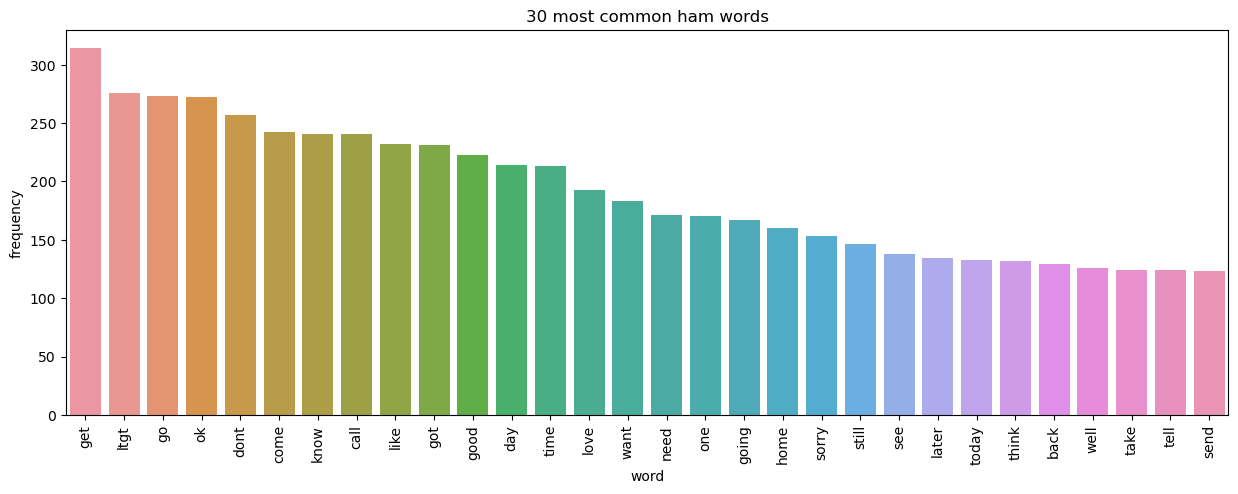

In [30]:
ham_words = list(data.loc[data.label == 'ham', 'cleaned_text'])
ham_words = list(np.concatenate(ham_words).flat)
ham_words = Counter(ham_words)
ham_words = pd.DataFrame(ham_words.most_common(30), columns=['word', 'frequency'])

# Plot most common ham words
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='word', y='frequency', data=ham_words, ax=ax)
plt.xticks(rotation=90)  # Set rotation to a valid value
plt.title("30 most common ham words")


Text(0.5, 1.0, '30 most common spam words')

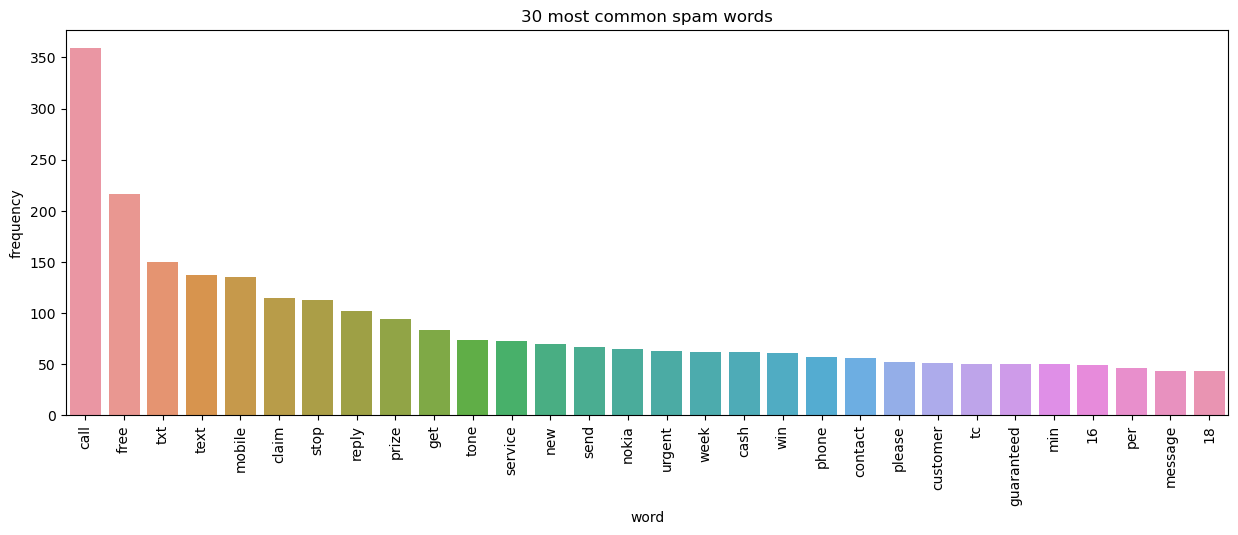

In [31]:
# Organise spam words data
spam_words = list(data.loc[data.label == 'spam', 'cleaned_text'])
spam_words = list(np.concatenate(spam_words).flat)
spam_words = Counter(spam_words)
spam_words = pd.DataFrame(spam_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common harm words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = spam_words, ax = ax)
plt.xticks(rotation = 90)
plt.title("30 most common spam words")

In [32]:
# Inspect the column names of your dataset
print(data.columns)


Index(['label', 'body_text', 'body_len', 'punct%', 'cleaned_text'], dtype='object')


In [33]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/sasank/anaconda3/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 139.3 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [35]:
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import time


In [36]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    cleaned_text = " ".join(tokens)
    
    # Return the cleaned text
    return cleaned_text


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2, random_state=42)


In [38]:
corpus = X_train.values.tolist() + X_test.values.tolist()  # Combine training and test sets

# Train Word2Vec model
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


In [39]:
def get_avg_word2vec(tokens):
    vectorized = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectorized) > 0:
        return np.mean(vectorized, axis=0)
    else:
        return np.zeros(model.vector_size)

In [40]:
# Combine training and test sets
corpus = X_train.astype(str).values.tolist() + X_test.astype(str).values.tolist()

# Tokenize the corpus and handle missing values
tokenized_corpus = [str(sentence).split() for sentence in corpus if sentence]

# Train Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Convert sentences to Word2Vec embeddings in the training set
X_train_word2vec = [get_avg_word2vec(tokens) for tokens in tokenized_corpus[:len(X_train)]]
X_train_word2vec = pd.DataFrame(X_train_word2vec)

# Convert sentences to Word2Vec embeddings in the test set
X_test_word2vec = [get_avg_word2vec(tokens) for tokens in tokenized_corpus[len(X_train):]]
X_test_word2vec = pd.DataFrame(X_test_word2vec)

# Concatenate Word2Vec embeddings with numerical features in the training set
X_train = pd.concat([X_train_word2vec, X_train.reset_index(drop=True)], axis=1)

# Concatenate Word2Vec embeddings with numerical features in the test set
X_test = pd.concat([X_test_word2vec, X_test.reset_index(drop=True)], axis=1)


In [41]:
print(X_train.columns)


Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
                93,          94,          95,          96,          97,
                98,          99, 'body_text',  'body_len',    'punct%'],
      dtype='object', length=103)


In [42]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate and fit TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_train = tfidf_vect.fit_transform(X_train['body_text'])
tfidf_test = tfidf_vect.transform(X_test['body_text'])

# Convert the TF-IDF vectors to DataFrames
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect.get_feature_names_out())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vect.get_feature_names_out())

# Concatenate the TF-IDF features with other numerical features in the training set
X_train = pd.concat([X_train, tfidf_train_df, X_train[['body_len', 'punct%']].reset_index(drop=True)], axis=1)

# Concatenate the TF-IDF features with other numerical features in the test set
X_test = pd.concat([X_test, tfidf_test_df, X_test[['body_len', 'punct%']].reset_index(drop=True)], axis=1)

# Check the shape of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


[nltk_data] Downloading package punkt to /Users/sasank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


X_train shape: (4457, 142)
Y_train shape: (4457,)
X_test shape: (1115, 142)
Y_test shape: (1115,)


In [43]:
# Default random forest 
print(RandomForestClassifier())

RandomForestClassifier()


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(data['body_text'], data['label'], test_size=0.2, random_state=42)

# Train Word2Vec on the training data
sentences = [nltk.word_tokenize(text) for text in X_train]
word2vec_model = gensim.models.Word2Vec(sentences, min_count=1)

In [45]:
def text_to_word2vec(text):
    tokens = nltk.word_tokenize(text)
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)


In [46]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import gensim

# Download the required tokenizer
nltk.download('punkt')

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(data['body_text'], data['label'], test_size=0.2, random_state=42)

# Train Word2Vec on the training data
sentences = [nltk.word_tokenize(text) for text in X_train]
word2vec_model = gensim.models.Word2Vec(sentences, min_count=1)

# Function to convert text to Word2Vec embeddings
def text_to_word2vec(text):
    tokens = nltk.word_tokenize(text)
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)

# Convert text to Word2Vec embeddings in the training set
X_train_word2vec = pd.DataFrame([text_to_word2vec(text) for text in X_train])

# Convert text to Word2Vec embeddings in the test set
X_test_word2vec = pd.DataFrame([text_to_word2vec(text) for text in X_test])

# Instantiate and fit TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

# Convert the TF-IDF vectors to DataFrames
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect.get_feature_names_out())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vect.get_feature_names_out())

# Concatenate the Word2Vec embeddings with the TF-IDF features and other numerical features in the training set
X_train = pd.concat([X_train_word2vec.reset_index(drop=True), tfidf_train_df, data.loc[X_train.index, ['body_len', 'punct%']].reset_index(drop=True)], axis=1)

# Concatenate the Word2Vec embeddings with the TF-IDF features and other numerical features in the test set
X_test = pd.concat([X_test_word2vec.reset_index(drop=True), tfidf_test_df, data.loc[X_test.index, ['body_len', 'punct%']].reset_index(drop=True)], axis=1)




[nltk_data] Downloading package punkt to /Users/sasank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

rf_model = rf.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

precision_rf = precision_score(Y_test, Y_pred_rf, pos_label='spam')
recall_rf = recall_score(Y_test, Y_pred_rf, pos_label='spam')
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

print(f"Random Forest - Precision: {round(precision_rf, 3)} / Recall: {round(recall_rf, 3)} / Accuracy: {round(accuracy_rf, 3)}")


Random Forest - Precision: 0.992 / Recall: 0.88 / Accuracy: 0.983


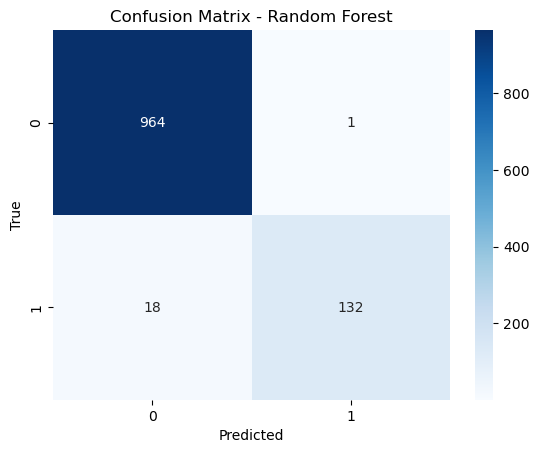

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')

# Display the plot
plt.show()


In [49]:
# Default gradient boosting 
print(GradientBoostingClassifier())

GradientBoostingClassifier()


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

# GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model = gb.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
precision_gb = precision_score(Y_test, Y_pred_gb, pos_label='spam')
recall_gb = recall_score(Y_test, Y_pred_gb, pos_label='spam')
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)

# Print the evaluation metrics
print(f"Gradient Boosting - Precision: {round(precision_gb, 3)} / Recall: {round(recall_gb, 3)} / Accuracy: {round(accuracy_gb, 3)}")


Gradient Boosting - Precision: 0.986 / Recall: 0.927 / Accuracy: 0.988


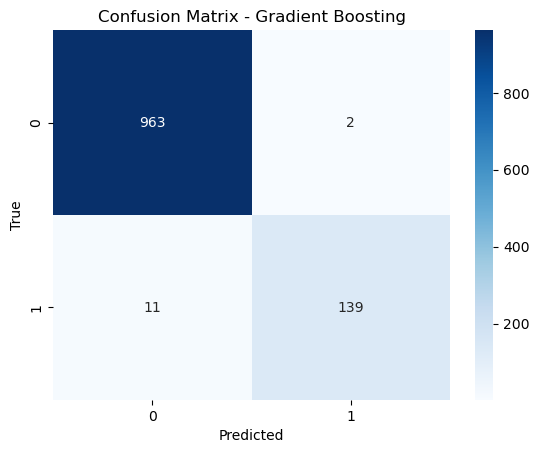

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_gb)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')

# Display the plot
plt.show()
